<a href="https://colab.research.google.com/github/Meghna8124/Predict-Historical-Artist/blob/master/PredictArtist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
import io
import tarfile

import PIL

import boto3

from fastai.vision import *

In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
bs=64
img_size=128

In [0]:
np.random.seed(42)
path = 'drive/My Drive/images/images'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(max_warp = None), size=img_size, bs = bs//2).normalize(imagenet_stats)

In [6]:
data.classes

['Albrecht_Dürer',
 'Alfred_Sisley',
 'Amedeo_Modigliani',
 'Andrei_Rublev',
 'Andy_Warhol',
 'Camille_Pissarro',
 'Caravaggio',
 'Claude_Monet',
 'Diego_Rivera',
 'Diego_Velazquez',
 'Edgar_Degas',
 'Edouard_Manet',
 'Edvard_Munch',
 'El_Greco',
 'Eugene_Delacroix',
 'Francisco_Goya',
 'Frida_Kahlo',
 'Georges_Seurat',
 'Giotto_di_Bondone',
 'Gustav_Klimt',
 'Gustave_Courbet',
 'Henri_Matisse',
 'Henri_Rousseau',
 'Henri_de_Toulouse-Lautrec',
 'Hieronymus_Bosch',
 'Jackson_Pollock',
 'Jan_van_Eyck',
 'Joan_Miro',
 'Kazimir_Malevich',
 'Leonardo_da_Vinci',
 'Marc_Chagall',
 'Michelangelo',
 'Mikhail_Vrubel',
 'Pablo_Picasso',
 'Paul_Cezanne',
 'Paul_Gauguin',
 'Paul_Klee',
 'Peter_Paul_Rubens',
 'Pierre-Auguste_Renoir',
 'Piet_Mondrian',
 'Pieter_Bruegel',
 'Raphael',
 'Rembrandt',
 'Rene_Magritte',
 'Salvador_Dali',
 'Sandro_Botticelli',
 'Titian',
 'Vasiliy_Kandinskiy',
 'Vincent_van_Gogh',
 'William_Turner']

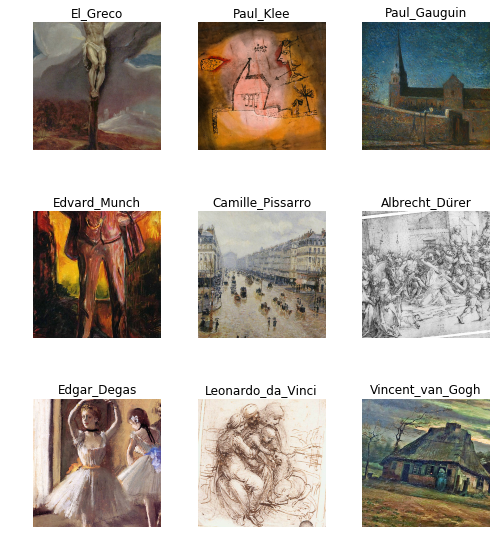

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 106793724.90it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


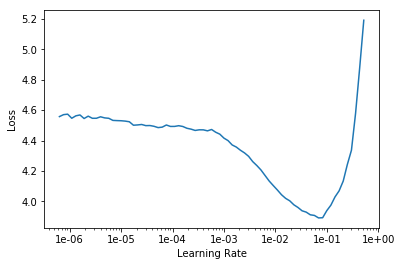

In [9]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 3e-4

In [11]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,3.560767,2.802141,0.678466,04:33
1,2.503291,2.086777,0.523894,04:27
2,2.089993,1.855434,0.470206,04:24
3,1.894614,1.776732,0.458997,04:28
4,1.845719,1.758586,0.449558,04:28


In [0]:
learn.save('art-stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


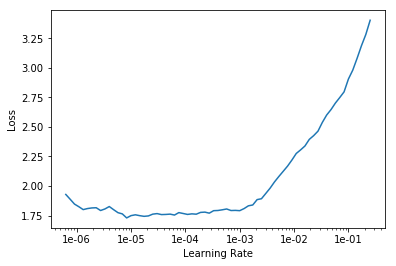

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.734752,1.650624,0.423599,04:32
1,1.527717,1.463227,0.378761,04:30
2,1.305346,1.315815,0.352212,04:31
3,1.077508,1.268787,0.330383,04:31
4,1.000783,1.256389,0.325074,04:30


In [0]:
learn.save('art-stage-2')

In [0]:
bs=48
img_size=299

In [0]:
np.random.seed(42)
path = 'drive/My Drive/images/images'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(max_warp = None), size=img_size, bs = bs//2).normalize(imagenet_stats)

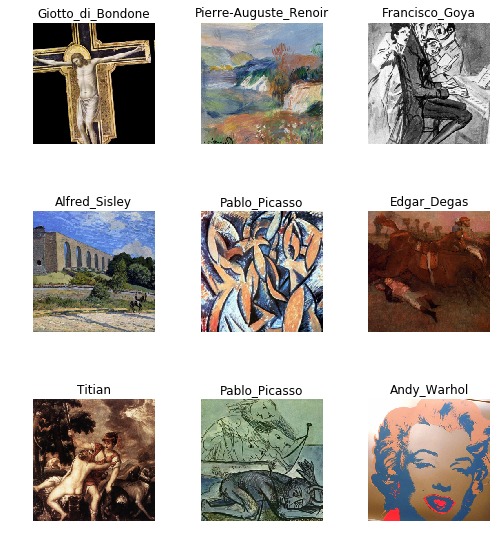

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 299, 299])

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


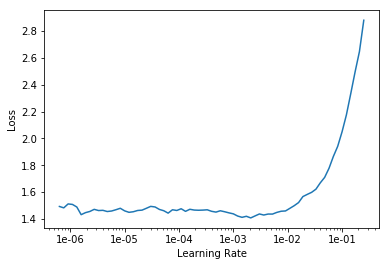

In [23]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-4

In [25]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.294539,1.169086,0.305605,07:57
1,1.204925,1.050996,0.276696,07:47
2,1.074931,0.984466,0.255457,07:48
3,1.015256,0.958139,0.249558,07:48
4,1.022933,0.955483,0.244248,07:46


In [0]:
learn.save('art-stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


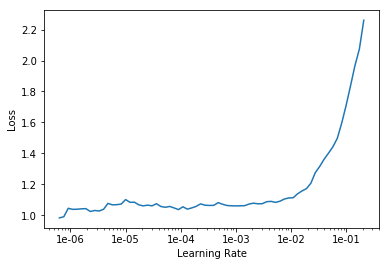

In [27]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.115348,0.957086,0.252507,08:20
1,1.051327,0.900366,0.251917,08:18
2,0.710014,0.690742,0.185251,08:15
3,0.371257,0.555367,0.144543,08:15
4,0.207911,0.523419,0.139233,08:17


In [0]:
learn.save('art-stage-4')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [34]:
interp.most_confused(3)

[('Pablo_Picasso', 'Vincent_van_Gogh', 5),
 ('Albrecht_Dürer', 'Leonardo_da_Vinci', 4),
 ('Joan_Miro', 'Paul_Klee', 4),
 ('Andy_Warhol', 'Pablo_Picasso', 3),
 ('Diego_Velazquez', 'Francisco_Goya', 3),
 ('Gustav_Klimt', 'Vincent_van_Gogh', 3),
 ('Henri_Matisse', 'Marc_Chagall', 3),
 ('Pablo_Picasso', 'Edgar_Degas', 3),
 ('Piet_Mondrian', 'Vincent_van_Gogh', 3),
 ('Raphael', 'Titian', 3),
 ('Vincent_van_Gogh', 'Claude_Monet', 3)]

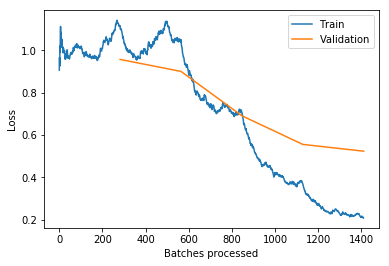

In [35]:
learn.recorder.plot_losses()

In [0]:
learn.export()